In [1]:
import sys, os 
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Input, Conv2D, Activation, Layer, ReLU, Softmax, BatchNormalization, MaxPool2D, AveragePooling2D, Rescaling, CenterCrop, RandomRotation, Embedding, Reshape, Add)
from tensorflow.keras.regularizers import l1_l2
import numpy as np 
import cv2 as cv 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# func to convert .png to .jpg files (.png files have 4 color channels, so regularize input file type with this func)
def png_to_jpg(input_dir, output_dir):
    for file in os.listdir(input_dir):
        if file.endswith('.png'):
            filePath = os.path.join(input_dir, file)
            image = cv.imread(filePath)
            output_file = os.path.splitext(file)[0]+".jpg"
            output_filepath = os.path.join(output_dir, output_file)
            cv.imwrite(output_filepath, image)
            os.remove(filePath)
    return

In [3]:
## Read in the images, create class labels, and preprocess for input into CNN ##
#num_classes = 36

path = '/Users/andy/particle_zoo/particle_zoo_organized_images' # change image path accordingly

# list to store particle (class) names
particle_types = []

# list to store all particle images. This is what will be randomly shuffled and will be train/validation/test split
images = []

for fileName in os.listdir(path):
    
    if not fileName.startswith("."):
        print(fileName)
        sub_dir_path = os.path.join(path, fileName)
        png_to_jpg(sub_dir_path, sub_dir_path)
        particle_types.append(fileName)
        
        if os.path.isdir(sub_dir_path):
            
            # loop over each file in each sub directory and append to a list of images
            for file in os.listdir(sub_dir_path):
             
                # ignore hidden files that your os may generate
                if not file.startswith('.'):
                    print(file)

                    # create directory path for the image
                    directory = os.path.join(sub_dir_path, file)
                    
                    # read in each image using openCV
                    image = cv.imread(directory)
                    # resize the images accordingly
                    image = cv.resize(image, (32,32))
                    # append to the list we are storing images
                    images.append(image)
                    # now detect the circle in the image
                    
                    

antitop quark
20230228_164658.jpg
20230228_164704.jpg
IMG_20221202_185454.jpg
20221202_185159.jpg
20230228_164707.jpg
20230228_164702.jpg
20230228_164715.jpg
20230228_164700.jpg
Screen Shot 2023-02-07 at 9.02.04 AM.jpg
20230228_164731.jpg
Screen Shot 2023-02-07 at 8.46.08 AM.jpg
20221202_185157.jpg
IMG_20221202_185458.jpg
Screen Shot 2023-02-07 at 9.18.07 AM.jpg
antiup quark
20230228_173654.jpg
20230228_173652.jpg
Screen Shot 2023-02-07 at 8.45.53 AM.jpg
IMG_20221202_185256.jpg
IMG_20221202_185312.jpg
20230228_173649.jpg
20230228_173648.jpg
20230228_173702.jpg
Screen Shot 2023-02-07 at 9.02.18 AM.jpg
IMG_20221202_185303.jpg
20230228_173658.jpg
Screen Shot 2023-02-07 at 9.16.22 AM.jpg
20221202_185725.jpg
20221202_185727.jpg
down quark
Screen Shot 2023-02-07 at 8.45.26 AM.jpg
20230228_174410.jpg
20230228_174449.jpg
20221202_185215.jpg
20221202_185219.jpg
20230228_174442.jpg
Screen Shot 2023-02-07 at 9.17.49 AM.jpg
20230228_174440.jpg
20230228_174447.jpg
20230228_174436.jpg
Screen Shot 20

20230228_173601.jpg
20230228_173604.jpg
20230228_173610.jpg
20230228_173607.jpg
20230228_173612.jpg
Screen Shot 2023-02-07 at 9.03.22 AM.jpg
antineutron
20221202_185529.jpg
20230228_173427.jpg
20230228_173433.jpg
Screen Shot 2023-02-07 at 9.16.15 AM.jpg
20230228_173426.jpg
Screen Shot 2023-02-07 at 9.03.29 AM.jpg
20230228_173443.jpg
20230228_173441.jpg
Screen Shot 2023-02-07 at 8.46.54 AM.jpg
20230228_173446.jpg
20230228_173429.jpg
20221202_185523.jpg
IMG_20221202_185206.jpg
20221202_185527.jpg
20230228_173439.jpg
IMG_20221202_185200.jpg
top quark
20230228_174011.jpg
Screen Shot 2023-02-07 at 8.44.43 AM.jpg
20230228_174017.jpg
20230228_174015.jpg
20230228_174001.jpg
IMG_20221202_185044.jpg
Screen Shot 2023-02-07 at 9.16.48 AM.jpg
IMG_20221202_185053.jpg
20230228_173914.jpg
20221202_185656.jpg
20230228_174031.jpg
20221202_185655.jpg
20230228_174026.jpg
20230228_173953.jpg
20230228_174023.jpg
Screen Shot 2023-02-07 at 9.02.55 AM.jpg
Higgs Boson
Screen Shot 2023-02-07 at 8.45.49 AM.jpg
Sc

In [4]:
# store images and labels in a dictionary
particle_dict = dict.fromkeys(particle_types)

for fileName in os.listdir(path):
    
    if not fileName.startswith("."):
        particle_dict[fileName] = []
        sub_dir_path = os.path.join(path, fileName)
        if os.path.isdir(sub_dir_path):
            
            # loop over each file in each sub directory and append to a list of images
            for file in os.listdir(sub_dir_path):
                # ignore hidden files that your os may generate
                if not file.startswith('.'):
                    directory = os.path.join(sub_dir_path, file)
                    image = cv.imread(directory)
                    image = cv.resize(image,(32,32))
                    particle_dict[fileName].append(image)                   
                    
labels = []
for key, value in particle_dict.items():
    for i in range(len(value)):
        labels.append(key)
one_hot_labels = pd.get_dummies(labels).values

images = np.array(images)
        
x_train, x_val, y_train, y_val = train_test_split(images, one_hot_labels, random_state = 42, test_size = 0.2, stratify = one_hot_labels)

x_train, X_test, y_train, Y_test = train_test_split(x_train, y_train, random_state = 42, test_size = 0.25, stratify = y_train)

In [14]:
# Benchmark model parameters(unqauntized)
l1p=0
l2p=1e-4

In [15]:
# # ResNet8 based model used for Pokemon Demo (w/o residual connections)

# # Input Layer
# inp = Input(shape=(32,32,3))
# x = Conv2D(num_filters=16,
#            kernel_size=(3,3),
#            strides=1, 
#            padding='same', 
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(inp)
# x = BatchNormalization()(inp)
# x = Activation('relu')(x)

# # First Stack 
# # Weight Layers
# y = Conv2D(num_filters=16,
#            kernel_size=(3,3), 
#            padding='same',
#            strides=1
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
# y = BatchNormalization()(y)
# y = Activation('relu')(y)
# y = Conv2D(num_filters=16,
#            kernel_size=(3,3), 
#            padding='same',
#            strides=1
#            kernel_initializer='he_normal', 
#            kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
# y = BatchNormalization()(y)
# y = Activation('relu')

# # Second Stack
# y = Conv2D(num_filters=)

In [16]:
# This is the out of the box model that was used for one of the legacy Pokemon Demos
# All that was changed was that the num_classes=36. Needs more hyperparameter tuning to find best benchmark model.
def resnet_v1_eembc(input_shape=[32, 32, 3], num_classes=36, l1p=0, l2p=1e-4,
                    num_filters=[16, 16,  # block 1
                                 32, 32,  # block 2
                                 64, 64  # block 3
                                 ],
                    kernel_sizes=[3, 3, 3,  # block 1
                                  3, 3, 1,  # block 2
                                  3, 3, 1  # block 3
                                  ],
                    strides=['111',  # block 1
                             '212',  # block 2
                             '212',  # block 3
                             ],
                    skip=True,
                    avg_pooling=False):

    # Input layer, change kernel size to 7x7 and strides to 2 for an official resnet
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters[0],
               kernel_size=kernel_sizes[0],
               strides=int(strides[0][0]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # First stack
    # Weight layers
    y = Conv2D(num_filters[1],
               kernel_size=kernel_sizes[1],
               strides=int(strides[0][1]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(num_filters[0],
               kernel_size=kernel_sizes[2],
               strides=int(strides[0][2]),
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
    y = BatchNormalization()(y)

    # Overall residual, connect weight layer and identity paths
    if skip:
        x = Add()([x, y])
    else:
        x = y
    x = Activation('relu')(x)

    if len(num_filters) > 2 and num_filters[2] > 0 and strides[1] != '' and kernel_sizes[3] > 0:
        # Second stack
        # Weight layers
        y = Conv2D(num_filters[2],
                   kernel_size=kernel_sizes[3],
                   strides=int(strides[1][0]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters[3],
                   kernel_size=kernel_sizes[4],
                   strides=int(strides[1][1]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
        y = BatchNormalization()(y)

        # Adjust for change in dimension due to stride in identity
        x = Conv2D(num_filters[3],
                   kernel_size=kernel_sizes[5],
                   strides=int(strides[1][2]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)

        # Overall residual, connect weight layer and identity paths
        if skip:
            x = Add()([x, y])
        else:
            x = y
        x = Activation('relu')(x)

    if len(num_filters) > 4 and num_filters[4] > 0 and strides[2] != '' and kernel_sizes[6] > 0:
        # Third stack
        # Weight layers
        y = Conv2D(num_filters[4],
                   kernel_size=kernel_sizes[6],
                   strides=int(strides[2][0]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(num_filters[5],
                   kernel_size=kernel_sizes[7],
                   strides=int(strides[2][1]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
        y = BatchNormalization()(y)

        # Adjust for change in dimension due to stride in identity
        x = Conv2D(num_filters[5],
                   kernel_size=kernel_sizes[8],
                   strides=int(strides[2][2]),
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)

        # Overall residual, connect weight layer and identity paths
        if skip:
            x = Add()([x, y])
        else:
            x = y
        x = Activation('relu')(x)

#     if len(num_filters) > 6 and num_filters[6] > 0 and strides[3] != '' and kernel_sizes[9] > 0:
#         # Fourth stack (not complete stack)
#         # Weight layers
#         y = Conv2D(num_filters[6],
#                    kernel_size=kernel_sizes[9],
#                    strides=int(strides[3][0]),
#                    padding='same',
#                    kernel_initializer='he_normal',
#                    kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(x)
#         y = BatchNormalization()(y)
#         x = Activation('relu')(y)

#     if len(num_filters) > 7 and num_filters[7] > 0 and strides[3] != '' and kernel_sizes[10] > 0:
#         y = x
#         y = Conv2D(num_filters[7],
#                    kernel_size=kernel_sizes[10],
#                    strides=int(strides[3][1]),
#                    padding='same',
#                    kernel_initializer='he_normal',
#                    kernel_regularizer=l1_l2(l1=l1p, l2=l2p))(y)
#         y = BatchNormalization()(y)
#         x = Activation('relu')(y)

#         # Overall residual, connect weight layer and identity paths
#         if skip:
#             y = QActivation(activation=logit_quantizer)(y)
#             x = Add()([x, y])
#         else:
#             x = y
#         x = QActivation(activation=activation_quantizer)(x)

    # Final classification layer.
    pool_size = int(np.amin(x.shape[1:3]))
    if pool_size > 1 and avg_pooling:
        x = AveragePooling2D(pool_size=pool_size)(x)
    y = Flatten()(x)
    y = Dense(num_classes,
              kernel_initializer='he_normal')(y)
    outputs = Activation('softmax', name='softmax')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [17]:
model = resnet_v1_eembc()

In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 32, 32, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 32, 32, 16)  64          ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation (Activation)        (None, 32, 32, 16)   0           ['batch_normalization_2[0][

In [19]:
n_epochs=100
batch_size=36

In [20]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/100
9/9 [==============================] - 1s 47ms/step - loss: 4.8775 - accuracy: 0.0278 - val_loss: 13.5341 - val_accuracy: 0.0275
Epoch 2/100
9/9 [==============================] - 0s 36ms/step - loss: 4.0098 - accuracy: 0.0525 - val_loss: 8.3453 - val_accuracy: 0.0275
Epoch 3/100
9/9 [==============================] - 0s 36ms/step - loss: 3.5716 - accuracy: 0.0895 - val_loss: 6.5737 - val_accuracy: 0.0367
Epoch 4/100
9/9 [==============================] - 0s 40ms/step - loss: 3.2001 - accuracy: 0.1852 - val_loss: 5.8810 - val_accuracy: 0.0550
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 2.8922 - accuracy: 0.2377 - val_loss: 5.5090 - val_accuracy: 0.0642
Epoch 6/100
9/9 [==============================] - 0s 35ms/step - loss: 2.6119 - accuracy: 0.3086 - val_loss: 5.1690 - val_accuracy: 0.0550
Epoch 7/100
9/9 [==============================] - 0s 36ms/step - loss: 2.3514 - accuracy: 0.4198 - val_loss: 4.9454 - val_accuracy: 0.0459
Epoch 8/100
9/9 [==

9/9 [==============================] - 0s 39ms/step - loss: 0.1109 - accuracy: 0.9938 - val_loss: 4.4252 - val_accuracy: 0.1009
Epoch 60/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1175 - accuracy: 0.9969 - val_loss: 4.4315 - val_accuracy: 0.1009
Epoch 61/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1093 - accuracy: 0.9969 - val_loss: 4.4367 - val_accuracy: 0.0826
Epoch 62/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1031 - accuracy: 0.9969 - val_loss: 4.4398 - val_accuracy: 0.0826
Epoch 63/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1049 - accuracy: 0.9969 - val_loss: 4.4428 - val_accuracy: 0.0826
Epoch 64/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1021 - accuracy: 0.9969 - val_loss: 4.4485 - val_accuracy: 0.1009
Epoch 65/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1065 - accuracy: 0.9938 - val_loss: 4.4538 - val_accuracy: 0.1009
Epoch 66/100
9/9 [========

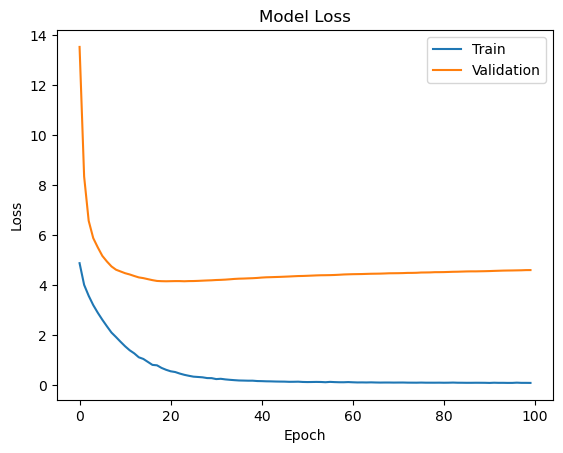

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

4/4 [==============================] - 0s 20ms/step
Plotting ROC for labels ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


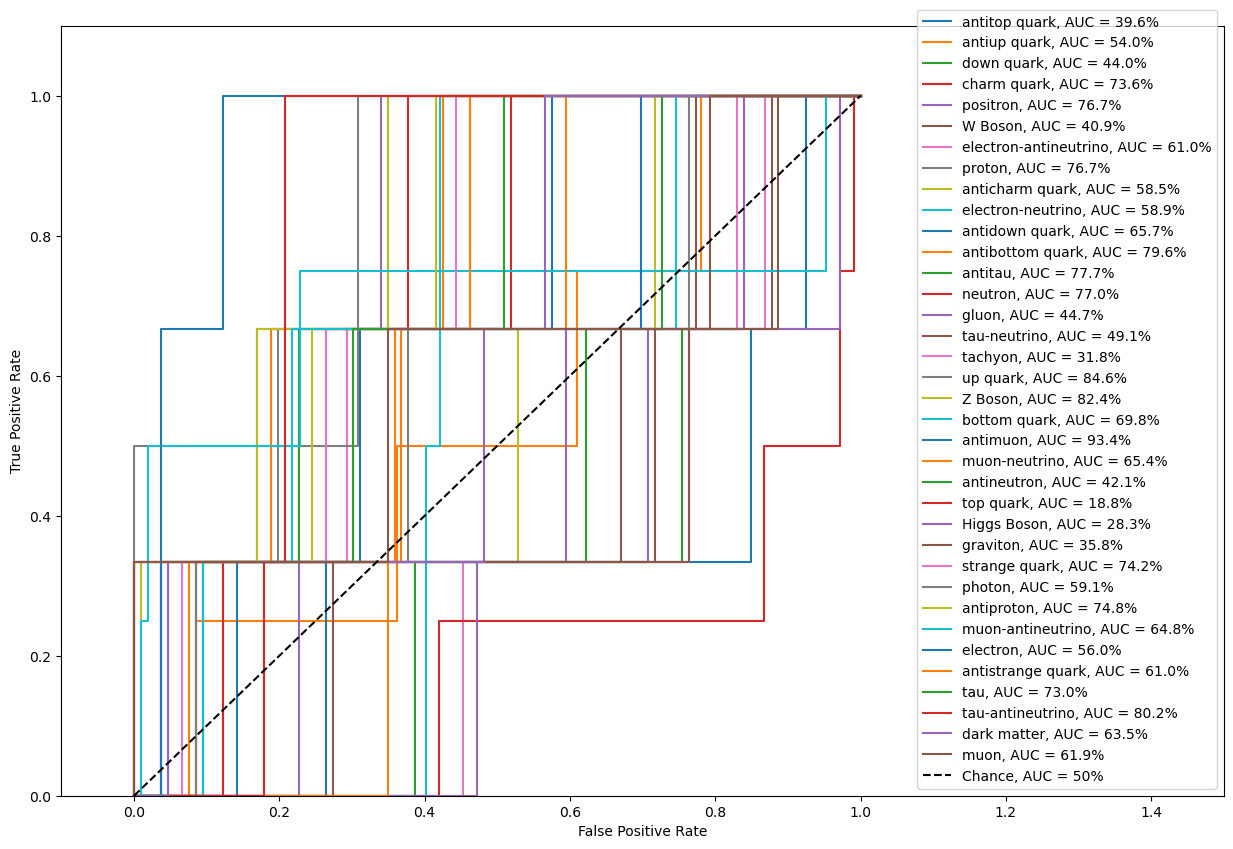

In [23]:
y_score = model.predict(X_test)
df = pd.DataFrame()
fpr  = {}
tpr  = {}
auc1 = {}
labels=['%i'%nr for nr in range (0,36)]
print('Plotting ROC for labels {}'.format(labels))

fig, ax = plt.subplots(figsize=(15, 10))
for i, label in enumerate(labels):
    df[label] = Y_test[:,int(label)]
    df[label + '_pred'] = y_score[:, int(label)]
    fpr[label], tpr[label], threshold = metrics.roc_curve(df[label],df[label+'_pred'])
    auc1[label] = metrics.auc(fpr[label], tpr[label])
    
    plt.plot(fpr[label],tpr[label], label=r'{}, AUC = {:.1f}%'.format(particle_types[int(label)],auc1[label]*100))

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
    
#plt.semilogx()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.5)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

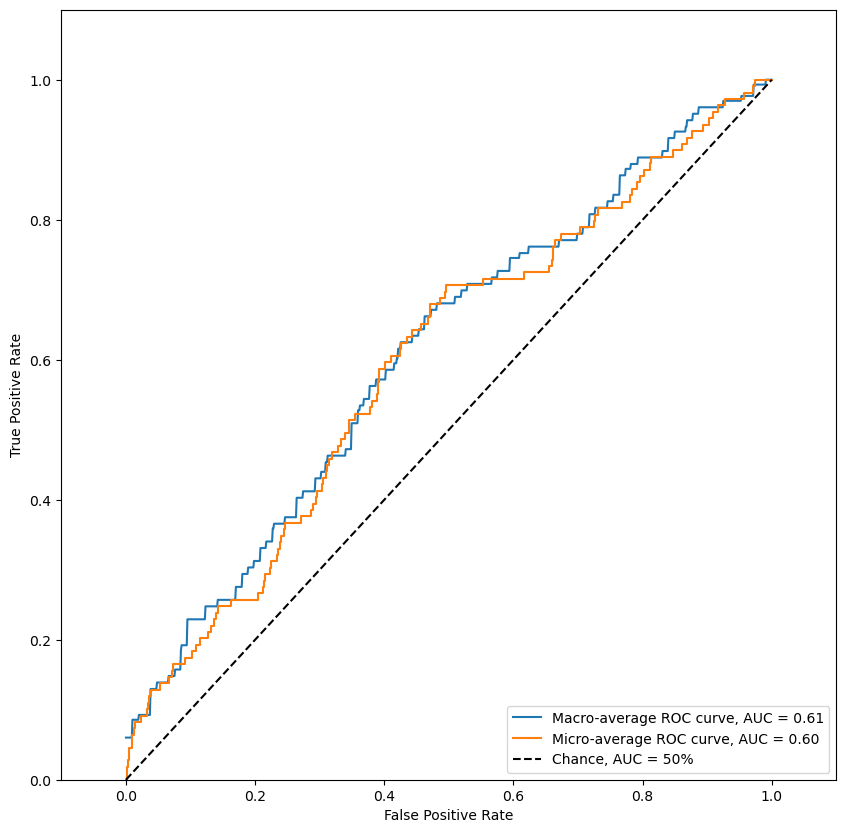

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

# Macro Average One vs Rest
macro_fpr = {}
macro_tpr = {}
macro_auc = {}
n_classes = 36
for i in range(n_classes):
    macro_fpr[i], macro_tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    macro_auc[i] = metrics.auc(macro_fpr[i], macro_tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, macro_fpr[i], macro_tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

macro_auc = metrics.auc(fpr_grid, mean_tpr)

plt.plot(
    fpr_grid,
    mean_tpr,
    label=f"Macro-average ROC curve, AUC = {macro_auc:.2f}",
)

# Micro Average One vs Rest
test_ravel = Y_test.ravel()
pred_ravel = y_score.ravel()
micro_fpr, micro_tpr, threshold = metrics.roc_curve(test_ravel, pred_ravel)
auc = metrics.auc(micro_fpr, micro_tpr) 
    
plt.plot(micro_fpr,micro_tpr, label=f"Micro-average ROC curve, AUC = {auc:.2f}")

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.1)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

In [6]:
n_epochs=1000
batch_size=36
initializer = 'lecun_uniform'

In [7]:
# The model we have made and trained 
inputArray = Input((32,32,3))
x = Rescaling(1./255)(inputArray)
x = RandomRotation(0.1)(x)
x = BatchNormalization()(x)
x = Conv2D(2, 2, kernel_initializer=initializer)(x)
x = keras.activations.relu(x)
x = Conv2D(3, 3, kernel_initializer=initializer)(x)
x = keras.activations.relu(x)
x = MaxPool2D(3,3)(x)
x = Conv2D(3, 3, kernel_initializer=initializer)(x)
x = keras.activations.relu(x)
x = AveragePooling2D(3,3)(x)

x = Flatten()(x)
    
# x = keras.layers.AlphaDropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)

x = Dense(5, kernel_initializer=initializer)(x)
x = keras.activations.sigmoid(x)
x = Dense(36, kernel_initializer=initializer)(x)
outputArray = keras.activations.softmax(x)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

## create/declare cnn model 
convNet = Model(inputs = inputArray, outputs = outputArray)

convNet.compile(loss = 'categorical_crossentropy',
                metrics = ['accuracy'],
               optimizer = opt)
convNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 31, 31, 2)         26        
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 31, 31, 2)         0     

In [8]:
historyV2 = convNet.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/1000


2023-04-18 13:33:50.621976: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 17ms/step - loss: 3.7365 - accuracy: 0.0278 - val_loss: 3.7193 - val_accuracy: 0.0275
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.7185 - accuracy: 0.0278 - val_loss: 3.7103 - val_accuracy: 0.0275
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 3.7067 - accuracy: 0.0278 - val_loss: 3.7023 - val_accuracy: 0.0275
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.6918 - accuracy: 0.0278 - val_loss: 3.6944 - val_accuracy: 0.0275
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.6772 - accuracy: 0.0278 - val_loss: 3.6872 - val_accuracy: 0.0275
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.6754 - accuracy: 0.0309 - val_loss: 3.6802 - val_accuracy: 0.0275
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.6532 - accuracy: 0.0340 - val_loss: 3.6739 - val_accuracy: 0.0275
Epoch 8/1000
9/9 [=============

9/9 [==============================] - 0s 9ms/step - loss: 3.4545 - accuracy: 0.1049 - val_loss: 3.5573 - val_accuracy: 0.0367
Epoch 60/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.4508 - accuracy: 0.0833 - val_loss: 3.5588 - val_accuracy: 0.0367
Epoch 61/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.4623 - accuracy: 0.0772 - val_loss: 3.5639 - val_accuracy: 0.0367
Epoch 62/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.4561 - accuracy: 0.0710 - val_loss: 3.5658 - val_accuracy: 0.0367
Epoch 63/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.4474 - accuracy: 0.0895 - val_loss: 3.5678 - val_accuracy: 0.0367
Epoch 64/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.4511 - accuracy: 0.0833 - val_loss: 3.5677 - val_accuracy: 0.0367
Epoch 65/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.4392 - accuracy: 0.0957 - val_loss: 3.5637 - val_accuracy: 0.0367
Epoch 66/1000
9/9 [========

9/9 [==============================] - 0s 9ms/step - loss: 3.2906 - accuracy: 0.0833 - val_loss: 3.4677 - val_accuracy: 0.0459
Epoch 118/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.2917 - accuracy: 0.0957 - val_loss: 3.4599 - val_accuracy: 0.0459
Epoch 119/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.2828 - accuracy: 0.1019 - val_loss: 3.4302 - val_accuracy: 0.0550
Epoch 120/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.2895 - accuracy: 0.0895 - val_loss: 3.4332 - val_accuracy: 0.0642
Epoch 121/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.2882 - accuracy: 0.1080 - val_loss: 3.4176 - val_accuracy: 0.0734
Epoch 122/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.2721 - accuracy: 0.0988 - val_loss: 3.4270 - val_accuracy: 0.0734
Epoch 123/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.2823 - accuracy: 0.0802 - val_loss: 3.4140 - val_accuracy: 0.0642
Epoch 124/1000
9/9 [=

Epoch 175/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.1422 - accuracy: 0.0895 - val_loss: 3.3648 - val_accuracy: 0.0550
Epoch 176/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.1295 - accuracy: 0.1049 - val_loss: 3.3591 - val_accuracy: 0.0550
Epoch 177/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.1283 - accuracy: 0.1142 - val_loss: 3.3746 - val_accuracy: 0.0550
Epoch 178/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.1203 - accuracy: 0.1111 - val_loss: 3.3508 - val_accuracy: 0.0917
Epoch 179/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.1279 - accuracy: 0.1019 - val_loss: 3.3869 - val_accuracy: 0.0550
Epoch 180/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.1341 - accuracy: 0.1080 - val_loss: 3.4140 - val_accuracy: 0.0550
Epoch 181/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.1267 - accuracy: 0.1049 - val_loss: 3.3819 - val_accuracy: 0.0550
Epoch 

Epoch 233/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.0001 - accuracy: 0.1389 - val_loss: 3.2964 - val_accuracy: 0.0734
Epoch 234/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.0160 - accuracy: 0.1049 - val_loss: 3.2635 - val_accuracy: 0.0826
Epoch 235/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.0175 - accuracy: 0.1204 - val_loss: 3.2586 - val_accuracy: 0.0826
Epoch 236/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.0020 - accuracy: 0.1389 - val_loss: 3.2793 - val_accuracy: 0.0826
Epoch 237/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.9938 - accuracy: 0.1080 - val_loss: 3.2696 - val_accuracy: 0.0734
Epoch 238/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.9849 - accuracy: 0.1420 - val_loss: 3.2831 - val_accuracy: 0.0734
Epoch 239/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.9924 - accuracy: 0.1111 - val_loss: 3.2410 - val_accuracy: 0.0642
Epoch 

Epoch 291/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8867 - accuracy: 0.1420 - val_loss: 3.1961 - val_accuracy: 0.0826
Epoch 292/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8932 - accuracy: 0.1451 - val_loss: 3.1889 - val_accuracy: 0.0917
Epoch 293/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8958 - accuracy: 0.1389 - val_loss: 3.1796 - val_accuracy: 0.1009
Epoch 294/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8684 - accuracy: 0.1574 - val_loss: 3.2048 - val_accuracy: 0.0826
Epoch 295/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.9177 - accuracy: 0.1235 - val_loss: 3.2333 - val_accuracy: 0.0826
Epoch 296/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8592 - accuracy: 0.1605 - val_loss: 3.2076 - val_accuracy: 0.0826
Epoch 297/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.8813 - accuracy: 0.1358 - val_loss: 3.2174 - val_accuracy: 0.0826
Epoch 

Epoch 349/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7852 - accuracy: 0.1481 - val_loss: 3.1324 - val_accuracy: 0.1193
Epoch 350/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7785 - accuracy: 0.1512 - val_loss: 3.1117 - val_accuracy: 0.1101
Epoch 351/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7555 - accuracy: 0.1728 - val_loss: 3.1003 - val_accuracy: 0.0917
Epoch 352/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7593 - accuracy: 0.1728 - val_loss: 3.1388 - val_accuracy: 0.0917
Epoch 353/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.8044 - accuracy: 0.1574 - val_loss: 3.0975 - val_accuracy: 0.1193
Epoch 354/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7899 - accuracy: 0.1543 - val_loss: 3.0882 - val_accuracy: 0.1101
Epoch 355/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7729 - accuracy: 0.1914 - val_loss: 3.0933 - val_accuracy: 0.1193
Epoch 

Epoch 407/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.6906 - accuracy: 0.1636 - val_loss: 3.0035 - val_accuracy: 0.1101
Epoch 408/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.7114 - accuracy: 0.1420 - val_loss: 3.0895 - val_accuracy: 0.1193
Epoch 409/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.6785 - accuracy: 0.1821 - val_loss: 2.9772 - val_accuracy: 0.1193
Epoch 410/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.6847 - accuracy: 0.1667 - val_loss: 2.9682 - val_accuracy: 0.1193
Epoch 411/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.6711 - accuracy: 0.1667 - val_loss: 2.9659 - val_accuracy: 0.1009
Epoch 412/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.6726 - accuracy: 0.1698 - val_loss: 2.9667 - val_accuracy: 0.1009
Epoch 413/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.6948 - accuracy: 0.1698 - val_loss: 2.9928 - val_accuracy: 0.1101
Epoch 

Epoch 465/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.6367 - accuracy: 0.1543 - val_loss: 2.9125 - val_accuracy: 0.1284
Epoch 466/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.6234 - accuracy: 0.1667 - val_loss: 2.9279 - val_accuracy: 0.1376
Epoch 467/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.6165 - accuracy: 0.1759 - val_loss: 2.9355 - val_accuracy: 0.1009
Epoch 468/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.5868 - accuracy: 0.1698 - val_loss: 2.9412 - val_accuracy: 0.1101
Epoch 469/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.6364 - accuracy: 0.1574 - val_loss: 2.9178 - val_accuracy: 0.1101
Epoch 470/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.5817 - accuracy: 0.1975 - val_loss: 2.9074 - val_accuracy: 0.1468
Epoch 471/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.5839 - accuracy: 0.2068 - val_loss: 2.9024 - val_accuracy: 0.1468
Epoch 

Epoch 523/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.5473 - accuracy: 0.2037 - val_loss: 2.8632 - val_accuracy: 0.1284
Epoch 524/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.5134 - accuracy: 0.1944 - val_loss: 2.8548 - val_accuracy: 0.1376
Epoch 525/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.5323 - accuracy: 0.1944 - val_loss: 2.8962 - val_accuracy: 0.1101
Epoch 526/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.5379 - accuracy: 0.1667 - val_loss: 2.8575 - val_accuracy: 0.1101
Epoch 527/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.5154 - accuracy: 0.1944 - val_loss: 2.8603 - val_accuracy: 0.1101
Epoch 528/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4925 - accuracy: 0.2191 - val_loss: 2.9067 - val_accuracy: 0.1193
Epoch 529/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.5609 - accuracy: 0.2006 - val_loss: 2.8821 - val_accuracy: 0.1376
Epoch 

Epoch 581/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4475 - accuracy: 0.2130 - val_loss: 2.8030 - val_accuracy: 0.1101
Epoch 582/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4515 - accuracy: 0.2099 - val_loss: 2.7840 - val_accuracy: 0.1193
Epoch 583/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4741 - accuracy: 0.2099 - val_loss: 2.8115 - val_accuracy: 0.1101
Epoch 584/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4627 - accuracy: 0.2160 - val_loss: 2.8549 - val_accuracy: 0.1009
Epoch 585/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4692 - accuracy: 0.1944 - val_loss: 2.8773 - val_accuracy: 0.1193
Epoch 586/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4442 - accuracy: 0.2284 - val_loss: 2.8283 - val_accuracy: 0.1284
Epoch 587/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4702 - accuracy: 0.2130 - val_loss: 2.8164 - val_accuracy: 0.1009
Epoch 

Epoch 639/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4189 - accuracy: 0.2191 - val_loss: 2.7875 - val_accuracy: 0.1009
Epoch 640/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4032 - accuracy: 0.2377 - val_loss: 2.7300 - val_accuracy: 0.1193
Epoch 641/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4071 - accuracy: 0.2562 - val_loss: 2.7385 - val_accuracy: 0.1560
Epoch 642/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4456 - accuracy: 0.1944 - val_loss: 2.7501 - val_accuracy: 0.1101
Epoch 643/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4082 - accuracy: 0.2130 - val_loss: 2.7726 - val_accuracy: 0.1101
Epoch 644/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3960 - accuracy: 0.2191 - val_loss: 2.7698 - val_accuracy: 0.1193
Epoch 645/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.4084 - accuracy: 0.2160 - val_loss: 2.7601 - val_accuracy: 0.1193
Epoch 

Epoch 697/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3440 - accuracy: 0.2284 - val_loss: 2.7021 - val_accuracy: 0.0917
Epoch 698/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3919 - accuracy: 0.1944 - val_loss: 2.7070 - val_accuracy: 0.1193
Epoch 699/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3726 - accuracy: 0.2315 - val_loss: 2.7270 - val_accuracy: 0.1376
Epoch 700/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3464 - accuracy: 0.2377 - val_loss: 2.7197 - val_accuracy: 0.1193
Epoch 701/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3531 - accuracy: 0.2407 - val_loss: 2.7509 - val_accuracy: 0.1101
Epoch 702/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3744 - accuracy: 0.2747 - val_loss: 2.7594 - val_accuracy: 0.1101
Epoch 703/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3473 - accuracy: 0.2346 - val_loss: 2.7519 - val_accuracy: 0.1009
Epoch 

Epoch 755/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3724 - accuracy: 0.2006 - val_loss: 2.6794 - val_accuracy: 0.0734
Epoch 756/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3773 - accuracy: 0.2099 - val_loss: 2.8264 - val_accuracy: 0.0826
Epoch 757/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3268 - accuracy: 0.2377 - val_loss: 2.7123 - val_accuracy: 0.1284
Epoch 758/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3405 - accuracy: 0.2346 - val_loss: 2.6842 - val_accuracy: 0.1376
Epoch 759/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3389 - accuracy: 0.2346 - val_loss: 2.6752 - val_accuracy: 0.1376
Epoch 760/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3704 - accuracy: 0.2377 - val_loss: 2.7021 - val_accuracy: 0.0734
Epoch 761/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3138 - accuracy: 0.2315 - val_loss: 2.6694 - val_accuracy: 0.0917
Epoch 

Epoch 813/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3029 - accuracy: 0.2469 - val_loss: 2.6804 - val_accuracy: 0.1284
Epoch 814/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3378 - accuracy: 0.2191 - val_loss: 2.7005 - val_accuracy: 0.1284
Epoch 815/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2884 - accuracy: 0.2623 - val_loss: 2.7162 - val_accuracy: 0.0917
Epoch 816/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2736 - accuracy: 0.2778 - val_loss: 2.7388 - val_accuracy: 0.1009
Epoch 817/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2979 - accuracy: 0.2346 - val_loss: 2.7300 - val_accuracy: 0.1009
Epoch 818/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3381 - accuracy: 0.2222 - val_loss: 2.7719 - val_accuracy: 0.0917
Epoch 819/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3186 - accuracy: 0.2315 - val_loss: 2.6977 - val_accuracy: 0.1468
Epoch 

Epoch 871/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2476 - accuracy: 0.2623 - val_loss: 2.6205 - val_accuracy: 0.1927
Epoch 872/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2803 - accuracy: 0.2438 - val_loss: 2.6127 - val_accuracy: 0.2018
Epoch 873/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2485 - accuracy: 0.2840 - val_loss: 2.6544 - val_accuracy: 0.1743
Epoch 874/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2657 - accuracy: 0.2407 - val_loss: 2.6822 - val_accuracy: 0.1560
Epoch 875/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2838 - accuracy: 0.2623 - val_loss: 2.7197 - val_accuracy: 0.1560
Epoch 876/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3140 - accuracy: 0.2500 - val_loss: 2.6959 - val_accuracy: 0.1193
Epoch 877/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.3006 - accuracy: 0.2562 - val_loss: 2.7351 - val_accuracy: 0.1101
Epoch 

Epoch 929/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2477 - accuracy: 0.2685 - val_loss: 2.6679 - val_accuracy: 0.1651
Epoch 930/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2191 - accuracy: 0.2747 - val_loss: 2.6435 - val_accuracy: 0.1468
Epoch 931/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2819 - accuracy: 0.2562 - val_loss: 2.6541 - val_accuracy: 0.1376
Epoch 932/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2387 - accuracy: 0.2407 - val_loss: 2.6765 - val_accuracy: 0.1193
Epoch 933/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2148 - accuracy: 0.2685 - val_loss: 2.7055 - val_accuracy: 0.1101
Epoch 934/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2758 - accuracy: 0.2469 - val_loss: 2.7063 - val_accuracy: 0.1193
Epoch 935/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2165 - accuracy: 0.2840 - val_loss: 2.6926 - val_accuracy: 0.1284
Epoch 

Epoch 987/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2067 - accuracy: 0.2685 - val_loss: 2.7269 - val_accuracy: 0.1284
Epoch 988/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2157 - accuracy: 0.2654 - val_loss: 2.7315 - val_accuracy: 0.1193
Epoch 989/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2732 - accuracy: 0.2438 - val_loss: 2.7014 - val_accuracy: 0.1284
Epoch 990/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2326 - accuracy: 0.2562 - val_loss: 2.6793 - val_accuracy: 0.1560
Epoch 991/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2118 - accuracy: 0.2654 - val_loss: 2.6468 - val_accuracy: 0.1468
Epoch 992/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2516 - accuracy: 0.2593 - val_loss: 2.7236 - val_accuracy: 0.1376
Epoch 993/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.2108 - accuracy: 0.2562 - val_loss: 2.7545 - val_accuracy: 0.1468
Epoch 

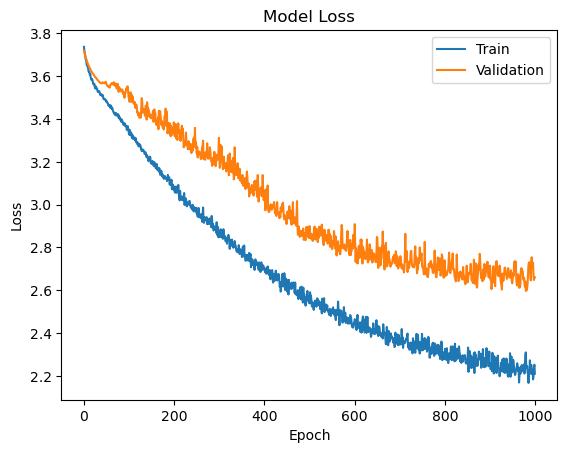

In [9]:
plt.plot(historyV2.history['loss'])
plt.plot(historyV2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

4/4 [==============================] - 0s 2ms/step
Plotting ROC for labels ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


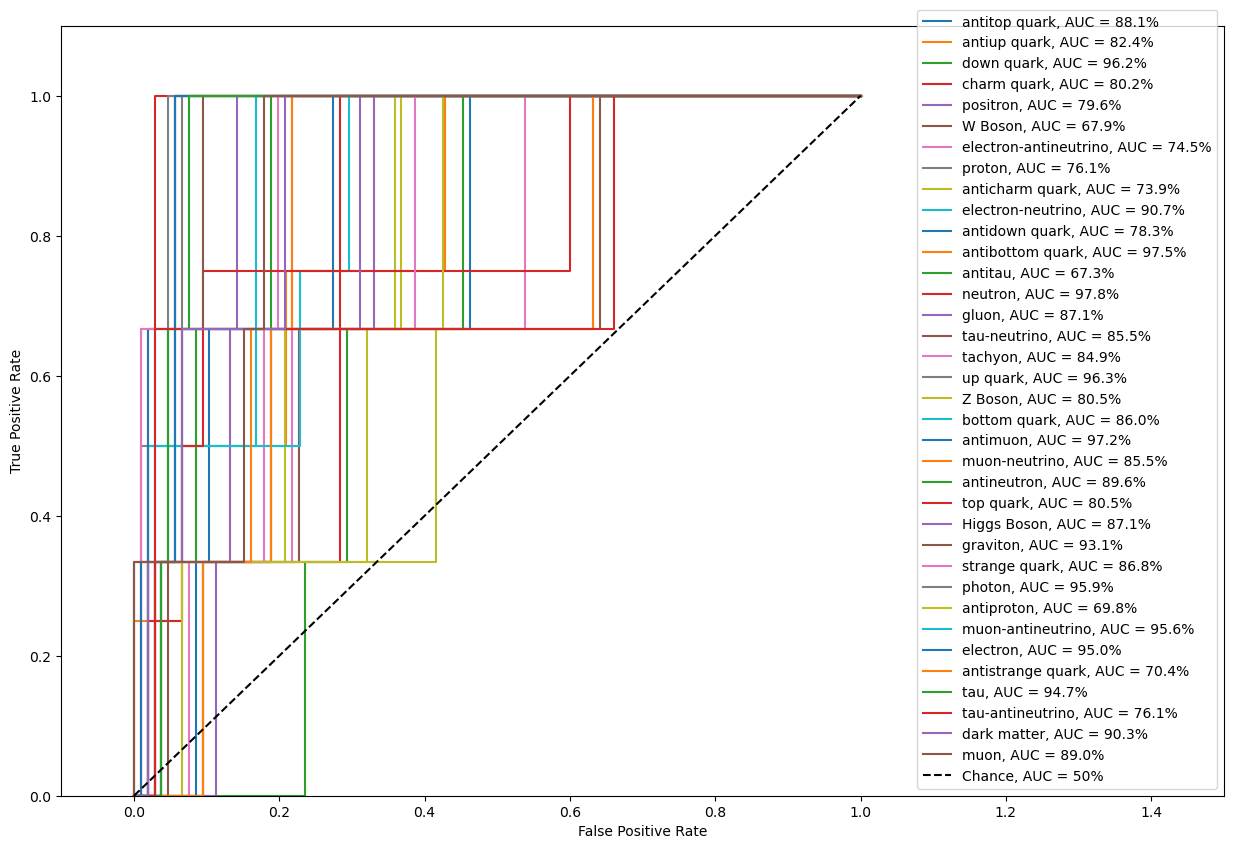

In [12]:
y_score = convNet.predict(X_test)
df = pd.DataFrame()
fpr  = {}
tpr  = {}
auc1 = {}
labels=['%i'%nr for nr in range (0,36)]
print('Plotting ROC for labels {}'.format(labels))

fig, ax = plt.subplots(figsize=(15, 10))
for i, label in enumerate(labels):
    df[label] = Y_test[:,int(label)]
    df[label + '_pred'] = y_score[:, int(label)]
    fpr[label], tpr[label], threshold = metrics.roc_curve(df[label],df[label+'_pred'])
    auc1[label] = metrics.auc(fpr[label], tpr[label])
    
    plt.plot(fpr[label],tpr[label], label=r'{}, AUC = {:.1f}%'.format(particle_types[int(label)],auc1[label]*100))

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
    
#plt.semilogx()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.5)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

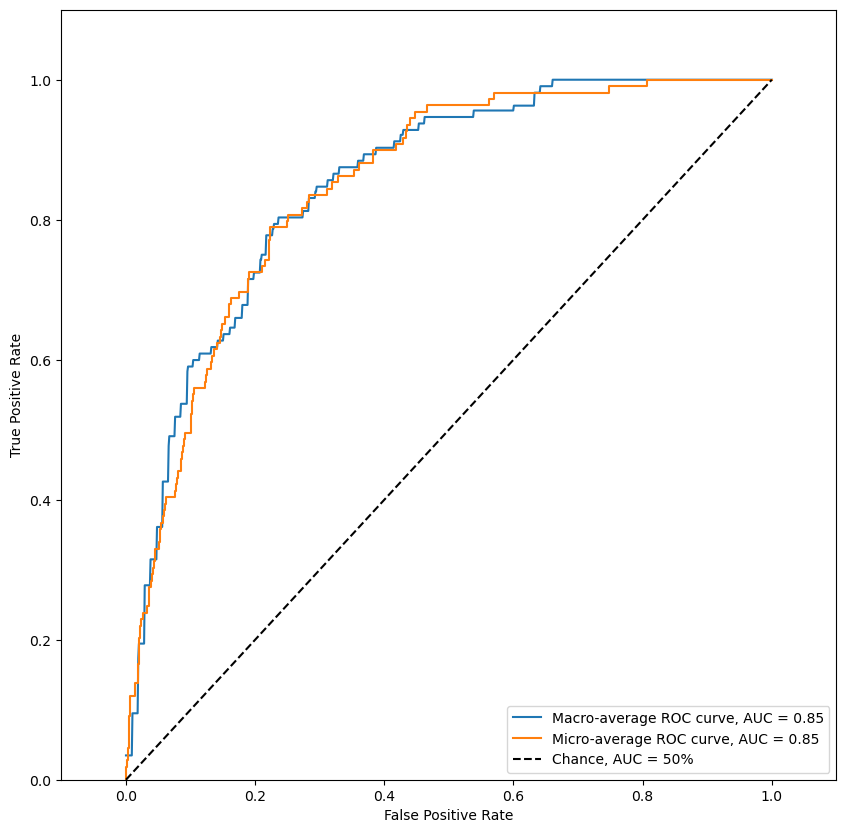

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

# Macro Average One vs Rest
macro_fpr = {}
macro_tpr = {}
macro_auc = {}
n_classes = 36
for i in range(n_classes):
    macro_fpr[i], macro_tpr[i], _ = metrics.roc_curve(Y_test[:, i], y_score[:, i])
    macro_auc[i] = metrics.auc(macro_fpr[i], macro_tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, macro_fpr[i], macro_tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

macro_auc = metrics.auc(fpr_grid, mean_tpr)

plt.plot(
    fpr_grid,
    mean_tpr,
    label=f"Macro-average ROC curve, AUC = {macro_auc:.2f}",
)

# Micro Average One vs Rest
test_ravel = Y_test.ravel()
pred_ravel = y_score.ravel()
micro_fpr, micro_tpr, threshold = metrics.roc_curve(test_ravel, pred_ravel)
auc = metrics.auc(micro_fpr, micro_tpr)
    
plt.plot(micro_fpr,micro_tpr, label=f"Micro-average ROC curve, AUC = {auc:.2f}")

plt.plot([0,1], [0,1], "k--", label="Chance, AUC = 50%")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlim(-0.1,1.1)
plt.ylim(0,1.1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Model compression and resource estimations


In [ ]:
# HLS model simulation


In [ ]:
# 